In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [3]:
df = pd.read_csv('/kaggle/input/forexsoftware-historical-forex-data/Historical Forex Data/EURUSD_H1.csv')


In [4]:
df.head()

,Time,Open,High,Low,Close,Volume
0,27/08/2008 21:00,1.47267,1.47289,1.47065,1.47133,11163
1,27/08/2008 22:00,1.47141,1.47265,1.47112,1.47225,8315
2,27/08/2008 23:00,1.47232,1.47438,1.47147,1.47430,12788
3,28/08/2008 0:00,1.47462,1.47652,1.47381,1.47561,27818
4,28/08/2008 1:00,1.47542,1.47863,1.47441,1.47797,24200


In [5]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)

In [6]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2008-08-27 21:00:00,1.47267,1.47289,1.47065,1.47133,11163
1,2008-08-27 22:00:00,1.47141,1.47265,1.47112,1.47225,8315
2,2008-08-27 23:00:00,1.47232,1.47438,1.47147,1.47430,12788
3,2008-08-28 00:00:00,1.47462,1.47652,1.47381,1.47561,27818
4,2008-08-28 01:00:00,1.47542,1.47863,1.47441,1.47797,24200


In [7]:
df.describe()

,Time,Open,High,Low,Close,Volume
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2016-08-30 18:57:18.936000256,1.208629,1.209581,1.207692,1.208628,10953.855990
min,2008-08-27 21:00:00,0.953900,0.955920,0.953570,0.953900,1.000000
25%,2012-08-24 16:45:00,1.104490,1.105278,1.103750,1.104500,3808.750000
50%,2016-08-30 20:30:00,1.177280,1.177920,1.176640,1.177280,7423.000000
75%,2020-09-03 09:15:00,1.316702,1.317840,1.315610,1.316690,13464.000000
max,2024-09-05 07:00:00,1.514230,1.514410,1.512830,1.514200,688880.000000
std,NaN,0.123311,0.123524,0.123085,0.123310,12040.398259


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    100000 non-null  datetime64[ns]
 1   Open    100000 non-null  float64       
 2   High    100000 non-null  float64       
 3   Low     100000 non-null  float64       
 4   Close   100000 non-null  float64       
 5   Volume  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 MB


In [9]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df.isnull().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visualization

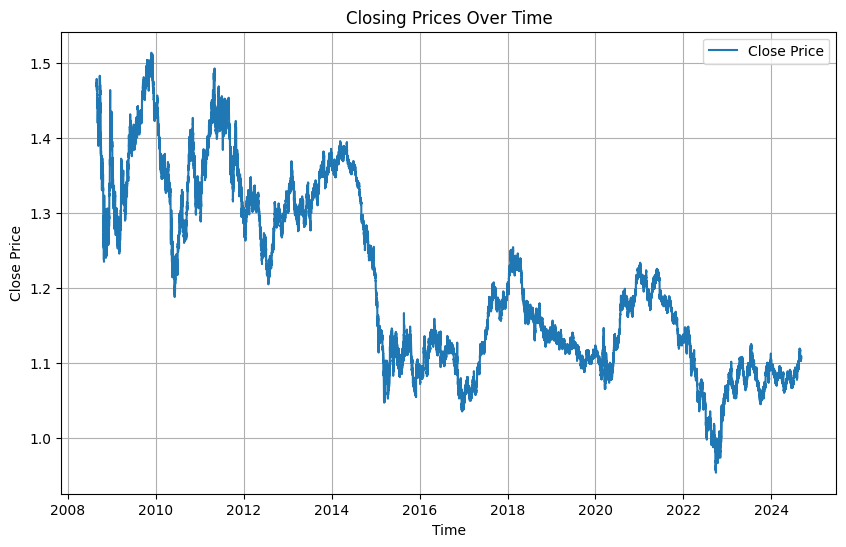

In [11]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

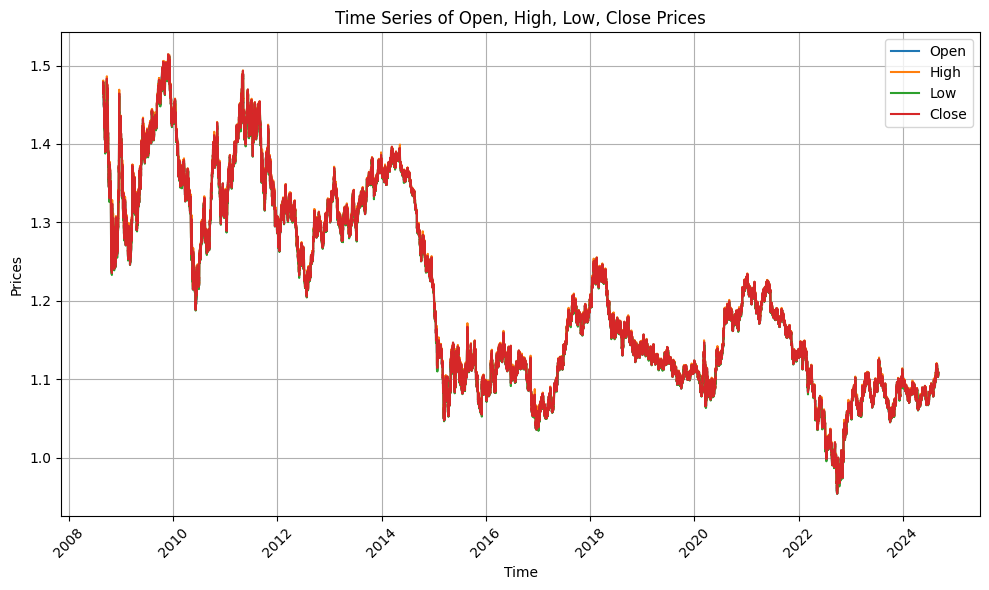

In [12]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Open'], label='Open')
plt.plot(df['Time'], df['High'], label='High')
plt.plot(df['Time'], df['Low'], label='Low')
plt.plot(df['Time'], df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


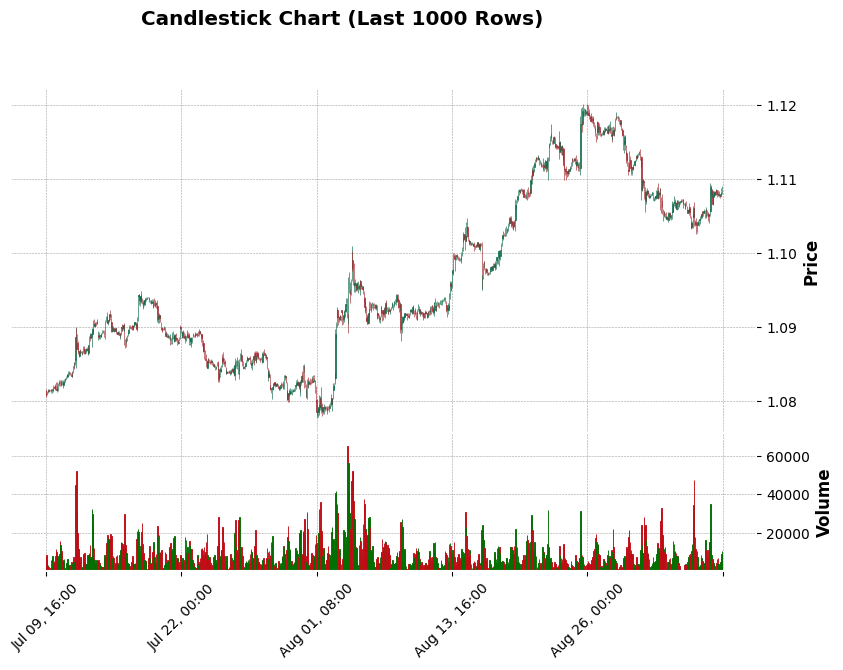

In [13]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Set the 'Time' as the index for plotting
subset_df.set_index('Time', inplace=True)

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


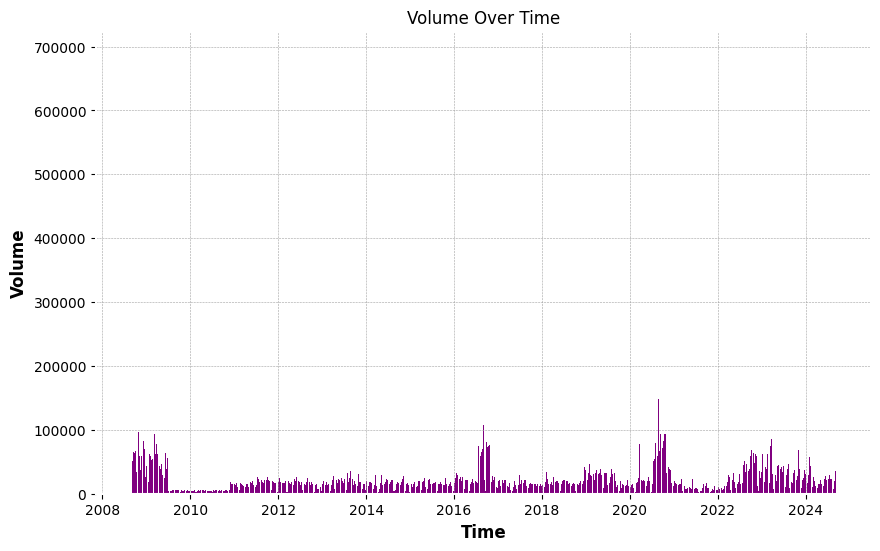

In [14]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Time'], df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


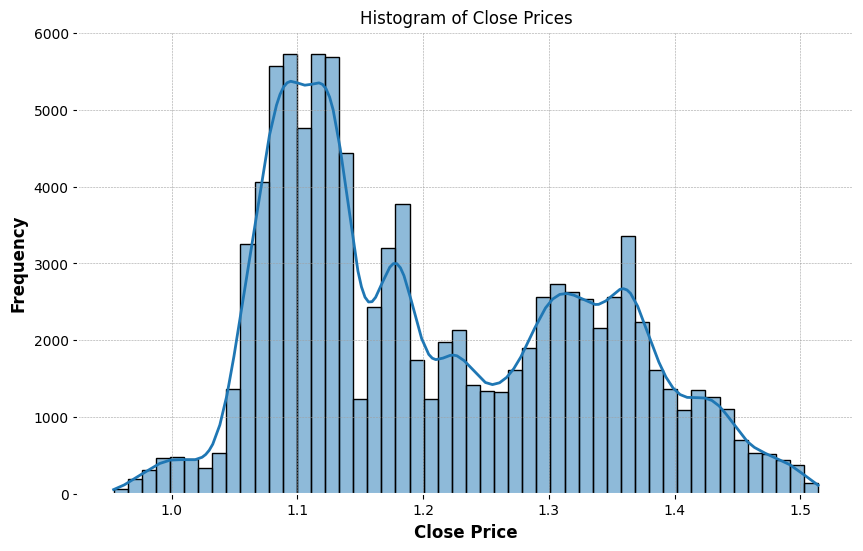

In [15]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

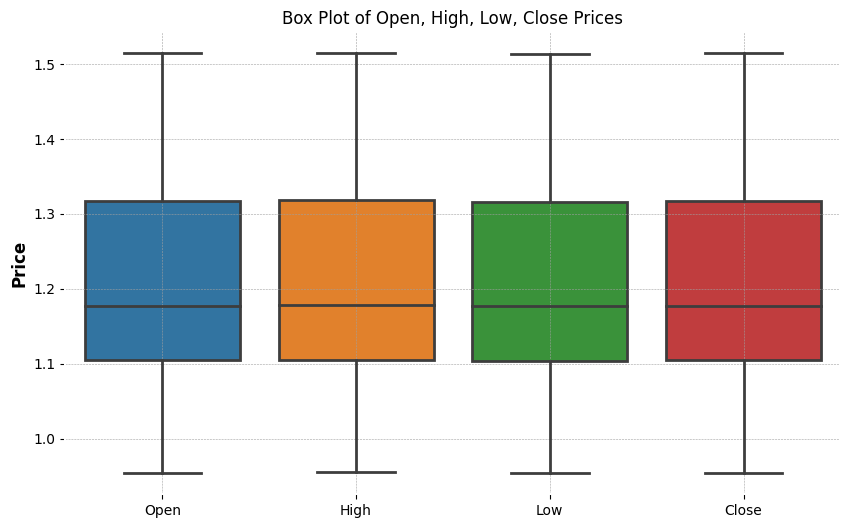

In [16]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

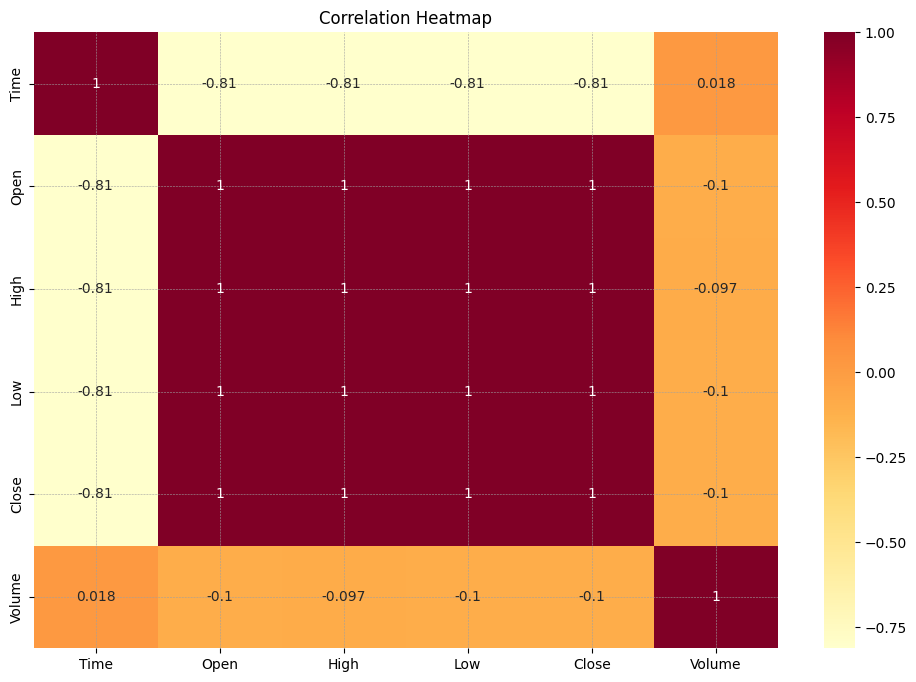

In [17]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

Creation of the Target Column(Price direction)

In [18]:
# Calculate percentage change between consecutive closing prices
df['Pct Change'] = df['Close'].pct_change() * 100

# Define thresholds for 'Up', 'Down', and 'Neutral'
def price_direction(change):
    if change > 0.5:
        return 'Up'
    elif change < -0.5:
        return 'Down'
    else:
        return 'Neutral'

# Apply the function to create the 'Price Direction' column
df['Price Direction'] = df['Pct Change'].shift(-1).apply(price_direction)

# Drop the percentage change column if not needed
df = df.drop(columns=['Pct Change'])

Lagged Returns / Price Differences

In [19]:
df['1_day_return'] = df['Close'].pct_change(1)
df['7_day_return'] = df['Close'].pct_change(7)
df['14_day_return'] = df['Close'].pct_change(14)


Moving Averages (MA)

In [20]:
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_14'] = df['Close'].rolling(window=14).mean()
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()


Relative Strength Index (RSI)

In [21]:
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a given data series.

    Parameters:
    data (pandas.Series): The price series (e.g., closing prices).
    window (int): The look-back period for RSI calculation (default is 14).

    Returns:
    pandas.Series: RSI values for the given data.
    """
    # Calculate price changes
    delta = data.diff()

    # Separate the positive and negative changes
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the relative strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [22]:
df['RSI'] = calculate_rsi(df['Close'], window=14) 

Bollinger Bands

In [23]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Std_20'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['MA_20'] + (df['Std_20'] * 2)
df['Lower_Band'] = df['MA_20'] - (df['Std_20'] * 2)


 On-Balance Volume (OBV)

In [24]:
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()


Volatility

In [25]:
def compute_atr(high, low, close, window=14):
    """
    Function to compute the Average True Range (ATR).
    
    Parameters:
    - high (pd.Series): Series of high prices.
    - low (pd.Series): Series of low prices.
    - close (pd.Series): Series of closing prices.
    - window (int): The look-back period for the ATR (default 14 days).
    
    Returns:
    - pd.Series: Average True Range (ATR) values.
    """
    # Calculate True Range (TR)
    high_low = high - low
    high_close = (high - close.shift(1)).abs()
    low_close = (low - close.shift(1)).abs()
    
    true_range = pd.DataFrame({'high_low': high_low, 'high_close': high_close, 'low_close': low_close}).max(axis=1)
    
    # Calculate ATR as the rolling average of the true range
    atr = true_range.rolling(window=window).mean()
    
    return atr


In [26]:
df['ATR_14'] = compute_atr(df['High'], df['Low'], df['Close'], window=14)  # Function to compute ATR


Crossover Indicators

In [27]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['SMA_Cross'] = np.where(df['SMA_50'] > df['SMA_200'], 1, 0)


 Volume-Based Features

In [28]:
df['Volume_Change'] = df['Volume'].pct_change()
df['Volume_SMA_7'] = df['Volume'].rolling(window=7).mean()


Price Momentum (Stochastic Oscillator)

In [29]:
def compute_stochastic(close, low, high, window=14):
    """
    Function to compute the Stochastic Oscillator.
    
    Parameters:
    - close (pd.Series): Series of closing prices.
    - low (pd.Series): Series of low prices.
    - high (pd.Series): Series of high prices.
    - window (int): The look-back period for the oscillator (default 14 days).
    
    Returns:
    - pd.Series: Stochastic Oscillator (%K) values.
    """
    # Calculate the rolling lowest low and highest high over the specified window
    lowest_low = low.rolling(window=window).min()
    highest_high = high.rolling(window=window).max()

    # Calculate the Stochastic Oscillator (%K)
    stochastic_k = ((close - lowest_low) / (highest_high - lowest_low)) * 100

    return stochastic_k


In [30]:
df['Stochastic_Oscillator'] = compute_stochastic(df['Close'], df['Low'], df['High'], window=14)

In [31]:
df.head()

,Time,Open,High,Low,Close,Volume,Price Direction,1_day_return,7_day_return,14_day_return,...,Upper_Band,Lower_Band,OBV,ATR_14,SMA_50,SMA_200,SMA_Cross,Volume_Change,Volume_SMA_7,Stochastic_Oscillator
0,2008-08-27 21:00:00,1.47267,1.47289,1.47065,1.47133,11163,Neutral,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2008-08-27 22:00:00,1.47141,1.47265,1.47112,1.47225,8315,Neutral,0.000625,NaN,NaN,...,NaN,NaN,8315.0,NaN,NaN,NaN,0,-0.255129,NaN,NaN
2,2008-08-27 23:00:00,1.47232,1.47438,1.47147,1.47430,12788,Neutral,0.001392,NaN,NaN,...,NaN,NaN,21103.0,NaN,NaN,NaN,0,0.537943,NaN,NaN
3,2008-08-28 00:00:00,1.47462,1.47652,1.47381,1.47561,27818,Neutral,0.000889,NaN,NaN,...,NaN,NaN,48921.0,NaN,NaN,NaN,0,1.175321,NaN,NaN
4,2008-08-28 01:00:00,1.47542,1.47863,1.47441,1.47797,24200,Neutral,0.001599,NaN,NaN,...,NaN,NaN,73121.0,NaN,NaN,NaN,0,-0.130060,NaN,NaN


In [32]:
df.isnull().sum()

Time                       0
Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Price Direction            0
1_day_return               1
7_day_return               7
14_day_return             14
SMA_7                      6
SMA_14                    13
EMA_7                      0
RSI                        1
MA_20                     19
Std_20                    19
Upper_Band                19
Lower_Band                19
OBV                        1
ATR_14                    13
SMA_50                    49
SMA_200                  199
SMA_Cross                  0
Volume_Change              1
Volume_SMA_7               6
Stochastic_Oscillator     13
dtype: int64

In [33]:
df.fillna(df.bfill(), inplace=True) 

In [34]:
df.isnull().sum()

Time                     0
Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Price Direction          0
1_day_return             0
7_day_return             0
14_day_return            0
SMA_7                    0
SMA_14                   0
EMA_7                    0
RSI                      0
MA_20                    0
Std_20                   0
Upper_Band               0
Lower_Band               0
OBV                      0
ATR_14                   0
SMA_50                   0
SMA_200                  0
SMA_Cross                0
Volume_Change            0
Volume_SMA_7             0
Stochastic_Oscillator    0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode the target column
le = LabelEncoder()
df['Price Direction Encoded'] = le.fit_transform(df['Price Direction'])

# Extract the encoded target column
target = 'Price Direction Encoded'


In [36]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Price Direction',
       '1_day_return', '7_day_return', '14_day_return', 'SMA_7', 'SMA_14',
       'EMA_7', 'RSI', 'MA_20', 'Std_20', 'Upper_Band', 'Lower_Band', 'OBV',
       'ATR_14', 'SMA_50', 'SMA_200', 'SMA_Cross', 'Volume_Change',
       'Volume_SMA_7', 'Stochastic_Oscillator', 'Price Direction Encoded'],
      dtype='object')

In [37]:
df = df.drop(columns=['Price Direction'])

In [38]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', '1_day_return',
       '7_day_return', '14_day_return', 'SMA_7', 'SMA_14', 'EMA_7', 'RSI',
       'MA_20', 'Std_20', 'Upper_Band', 'Lower_Band', 'OBV', 'ATR_14',
       'SMA_50', 'SMA_200', 'SMA_Cross', 'Volume_Change', 'Volume_SMA_7',
       'Stochastic_Oscillator', 'Price Direction Encoded'],
      dtype='object')

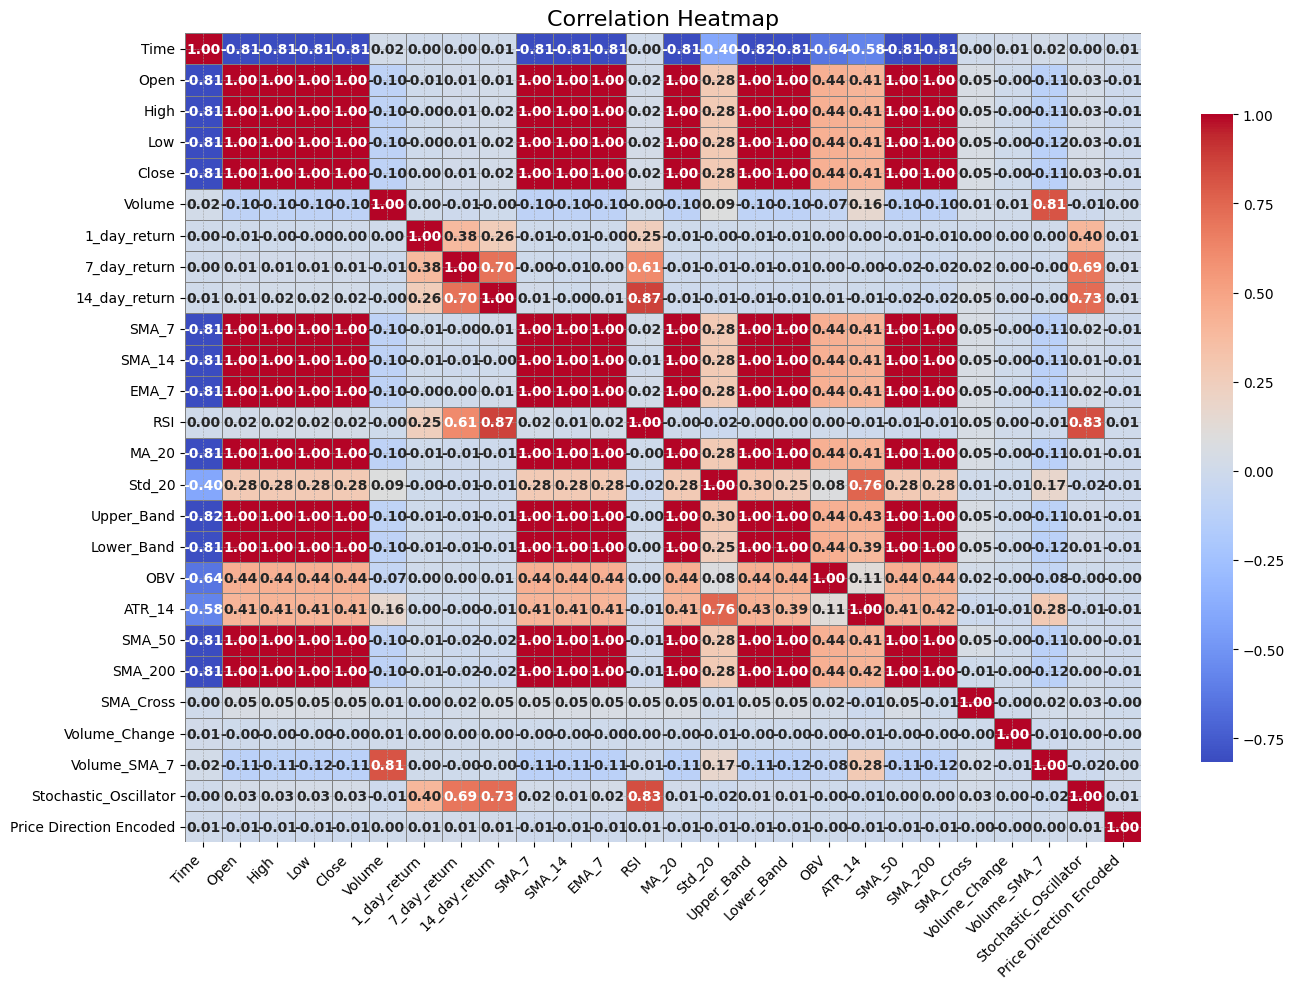

In [39]:
plt.figure(figsize=(14, 10)) 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 10, "weight": 'bold'}, 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={"shrink": .8}  
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  

plt.tight_layout()
plt.show()

In [40]:
# Extract the target column
target = 'Price Direction Encoded'

# Calculate Correlation with target column
correlation = df.corr()[target]

# Calculate Mutual Information
# Ensure that data types are numeric for mutual_info_regression
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(columns=[target])
y = df[target]

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to hold mutual information values
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi
})

# Merge mutual information with correlation
results = pd.DataFrame({
    'Correlation': correlation.drop(target),
    'Mutual_Information': mi_df.set_index('Feature')['Mutual_Information']
})

# Display results
print(results)

                       Correlation  Mutual_Information
14_day_return             0.011002            0.000933
1_day_return              0.010952            0.003205
7_day_return              0.012567            0.001698
ATR_14                   -0.007801            0.003829
Close                    -0.008909            0.001099
EMA_7                    -0.009135            0.000944
High                     -0.008903            0.000000
Low                      -0.008972            0.001146
Lower_Band               -0.009257            0.001350
MA_20                    -0.009430            0.001193
OBV                      -0.000434            0.001893
Open                     -0.009052            0.000011
RSI                       0.006933            0.000000
SMA_14                   -0.009276            0.001490
SMA_200                  -0.009633            0.001509
SMA_50                   -0.009884            0.001069
SMA_7                    -0.009149            0.001529
SMA_Cross 

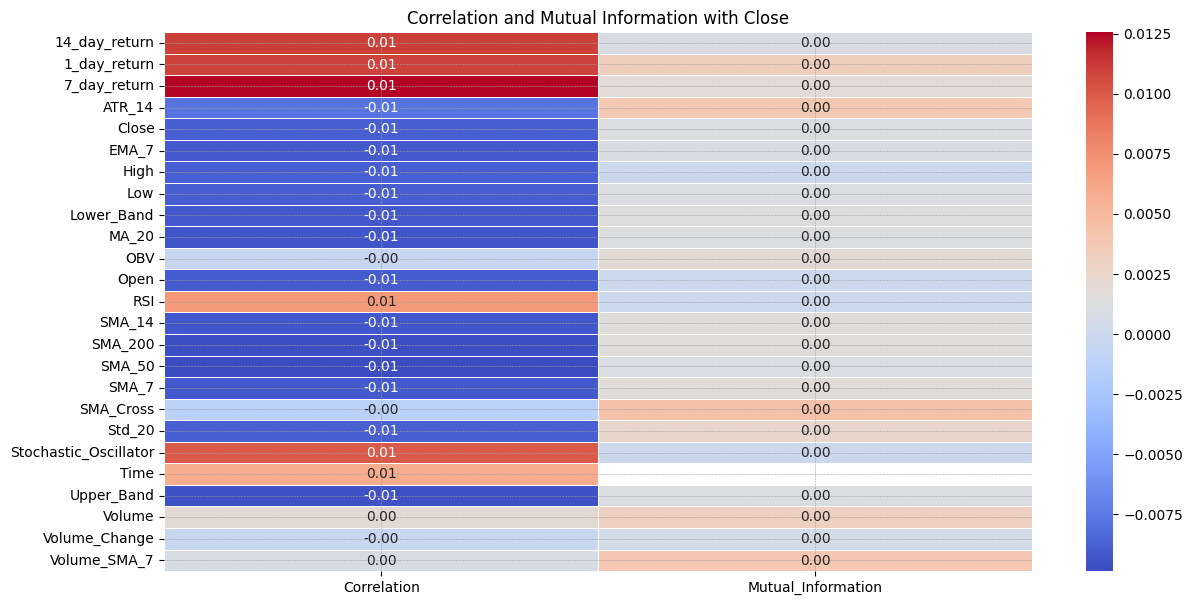

In [41]:
# Plotting the results
plt.figure(figsize=(14, 7))
sns.heatmap(results, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation and Mutual Information with Close')
plt.show()

In [42]:
df.head()

,Time,Open,High,Low,Close,Volume,1_day_return,7_day_return,14_day_return,SMA_7,...,Lower_Band,OBV,ATR_14,SMA_50,SMA_200,SMA_Cross,Volume_Change,Volume_SMA_7,Stochastic_Oscillator,Price Direction Encoded
0,2008-08-27 21:00:00,1.47267,1.47289,1.47065,1.47133,11163,0.000625,0.004608,0.004989,1.475389,...,1.469261,8315.0,0.003036,1.472632,1.449134,0,-0.255129,17901.142857,63.168317,1
1,2008-08-27 22:00:00,1.47141,1.47265,1.47112,1.47225,8315,0.000625,0.004608,0.004989,1.475389,...,1.469261,8315.0,0.003036,1.472632,1.449134,0,-0.255129,17901.142857,63.168317,1
2,2008-08-27 23:00:00,1.47232,1.47438,1.47147,1.47430,12788,0.001392,0.004608,0.004989,1.475389,...,1.469261,21103.0,0.003036,1.472632,1.449134,0,0.537943,17901.142857,63.168317,1
3,2008-08-28 00:00:00,1.47462,1.47652,1.47381,1.47561,27818,0.000889,0.004608,0.004989,1.475389,...,1.469261,48921.0,0.003036,1.472632,1.449134,0,1.175321,17901.142857,63.168317,1
4,2008-08-28 01:00:00,1.47542,1.47863,1.47441,1.47797,24200,0.001599,0.004608,0.004989,1.475389,...,1.469261,73121.0,0.003036,1.472632,1.449134,0,-0.130060,17901.142857,63.168317,1


In [43]:
df.dtypes

Time                       datetime64[ns]
Open                              float64
High                              float64
Low                               float64
Close                             float64
Volume                              int64
1_day_return                      float64
7_day_return                      float64
14_day_return                     float64
SMA_7                             float64
SMA_14                            float64
EMA_7                             float64
RSI                               float64
MA_20                             float64
Std_20                            float64
Upper_Band                        float64
Lower_Band                        float64
OBV                               float64
ATR_14                            float64
SMA_50                            float64
SMA_200                           float64
SMA_Cross                           int64
Volume_Change                     float64
Volume_SMA_7                      

## Splitting the Data

In [44]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Next_Close' is the target column

# Separate features and target
X = df.drop(columns=['Price Direction Encoded','Time'])
y = df['Price Direction Encoded']

# First split: Train and temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 70000
Validation set size: 15000
Testing set size: 15000


## Training and Evaluating Models

In [45]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

**Logistic Regression Classifier**

In [52]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


In [53]:
# Define the models
lr_model = LogisticRegression()

In [55]:
# Logistic Regression cross-validation with RandomizedSearchCV
lr_random_search = RandomizedSearchCV(estimator=lr_model,
                                      param_distributions=lr_param_grid,
                                      n_iter=10,  # Number of parameter settings to sample
                                      cv=5,       # 5-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)  # Use all available cores


# Train Logistic Regression model
lr_random_search.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {lr_random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23357214690901212}


In [ ]:
# Evaluate the best Logistic Regression model
best_lr = lr_random_search.best_estimator_
y_val_pred_lr = best_lr.predict(X_val)
y_test_pred_lr = best_lr.predict(X_test)

print("Logistic Regression Validation Accuracy: ", accuracy_score(y_val, y_val_pred_lr))
print("Logistic Regression Test Accuracy: ", accuracy_score(y_test, y_test_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_test_pred_lr))

**XGBoost Classifier**

In [ ]:
import xgboost as xgb

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# XGBoost cross-validation with RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=xgb_param_grid,
                                       n_iter=10,
                                       cv=5,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# Train XGBoost model
xgb_random_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_random_search.best_params_}")

In [ ]:
# Evaluate XGBoost model
best_xgb = xgb_random_search.best_estimator_
y_val_pred_xgb = best_xgb.predict(X_val)
y_test_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Validation Accuracy: ", accuracy_score(y_val, y_val_pred_xgb))
print("XGBoost Test Accuracy: ", accuracy_score(y_test, y_test_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_test_pred_xgb))


**LGBoost Classifier**

In [ ]:
import lightgbm as lgb

# Hyperparameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 10],
    'num_leaves': [31, 127],
    'min_child_samples': [20, 50, 100]
}

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier()

# LightGBM cross-validation with RandomizedSearchCV
lgb_random_search = RandomizedSearchCV(estimator=lgb_model,
                                       param_distributions=lgb_param_grid,
                                       n_iter=10,
                                       cv=5,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# Train LightGBM model
lgb_random_search.fit(X_train, y_train)
print(f"Best parameters for LightGBM: {lgb_random_search.best_params_}")

In [ ]:
# Evaluate LightGBM model
best_lgb = lgb_random_search.best_estimator_
y_val_pred_lgb = best_lgb.predict(X_val)
y_test_pred_lgb = best_lgb.predict(X_test)

print("LightGBM Validation Accuracy: ", accuracy_score(y_val, y_val_pred_lgb))
print("LightGBM Test Accuracy: ", accuracy_score(y_test, y_test_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_test_pred_lgb))


**Bi-Lstm**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Scaling the features for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape input for LSTM: (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define Bi-LSTM model
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Change activation and loss function based on task

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train Bi-LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_val_lstm, y_val))

In [ ]:

# Evaluate Bi-LSTM model
y_test_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
print("Bi-LSTM Test Accuracy: ", accuracy_score(y_test, y_test_pred_lstm))
print("Bi-LSTM Classification Report:\n", classification_report(y_test, y_test_pred_lstm))